# Predicting customer buying behaviour British Airway

- Predicting customer buying behaviour
- Build a predictive model to understand factors that influence buying behaviour 

# Data Understanding

Data summary
detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking (completed booking 1, incomplete booking 0)

> Importing Library

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\customer_booking.csv", encoding="ISO-8859-1")
df.head(3).transpose()

,0,1,2
num_passengers,2,1,2
sales_channel,Internet,Internet,Internet
trip_type,RoundTrip,RoundTrip,RoundTrip
purchase_lead,262,112,243
length_of_stay,19,20,22
flight_hour,7,3,17
flight_day,Sat,Sat,Wed
route,AKLDEL,AKLDEL,AKLDEL
booking_origin,New Zealand,New Zealand,India
wants_extra_baggage,1,0,1


# DATA PREPROCESSING
- size of the datasets
- distribution of the datasets
- identifying missing values or outliers

In [128]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


In [70]:
df.shape

(50000, 14)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [72]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [73]:
df.duplicated().sum()

719

In [74]:
df= df.drop_duplicates()

In [75]:
df.shape

(49281, 14)

In [76]:
df.sales_channel.value_counts()

Internet    43917
Mobile       5364
Name: sales_channel, dtype: int64

In [77]:
df.trip_type.value_counts()

RoundTrip     48779
OneWay          386
CircleTrip      116
Name: trip_type, dtype: int64

In [78]:
df.flight_day.value_counts()

Mon    7988
Wed    7562
Tue    7558
Thu    7323
Fri    6685
Sun    6442
Sat    5723
Name: flight_day, dtype: int64

In [79]:
df.booking_origin.value_counts()

Australia               17691
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

In [80]:
set(df.booking_origin)

{'(not set)',
 'Afghanistan',
 'Algeria',
 'Argentina',
 'Australia',
 'Austria',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bhutan',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Cambodia',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Czechia',
 'Denmark',
 'Egypt',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Guam',
 'Guatemala',
 'Hong Kong',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Laos',
 'Lebanon',
 'Macau',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mauritius',
 'Mexico',
 'Mongolia',
 'Myanmar (Burma)',
 'Nepal',
 'Netherlands',
 'New Caledonia',
 'New Zealand',
 'Nicaragua',
 'Norfolk Island',
 'Norway',
 'Oman',
 'Pakistan',
 'Panama',
 'Papua New Guinea',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Réunion',
 'Saudi Arabia',
 'Seychelles',
 'S

In [81]:
df.wants_extra_baggage.value_counts()

1    32931
0    16350
Name: wants_extra_baggage, dtype: int64

In [82]:
df.wants_in_flight_meals.value_counts()

0    28256
1    21025
Name: wants_in_flight_meals, dtype: int64

In [83]:
df.wants_preferred_seat.value_counts()

0    34712
1    14569
Name: wants_preferred_seat, dtype: int64

In [84]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

## Finding correlation

In [85]:
corr_table = df.corr()

<AxesSubplot: >

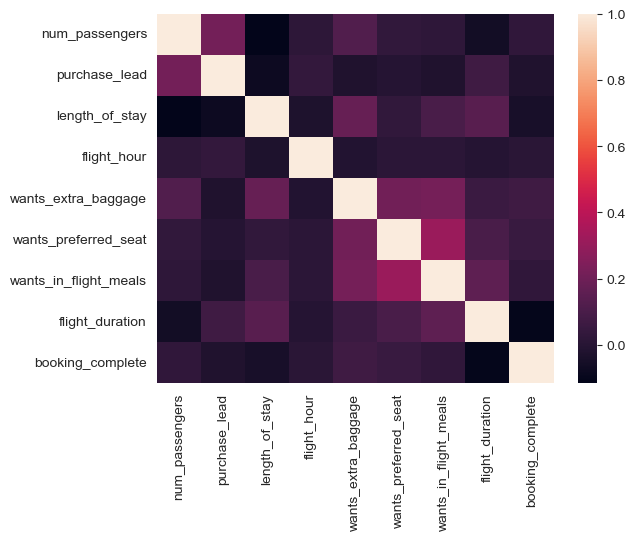

In [87]:
sns.heatmap(df.corr(),fmt='.2g')

# Data visualization

### "Completion Rate by Number of Passengers"

In [88]:
ct1=pd.crosstab(df['num_passengers'], df['booking_complete'], normalize='index')
ct1['Completion_Rate'] = ct1[1] / (ct1[0] + ct1[1])

<AxesSubplot: xlabel='num_passengers'>

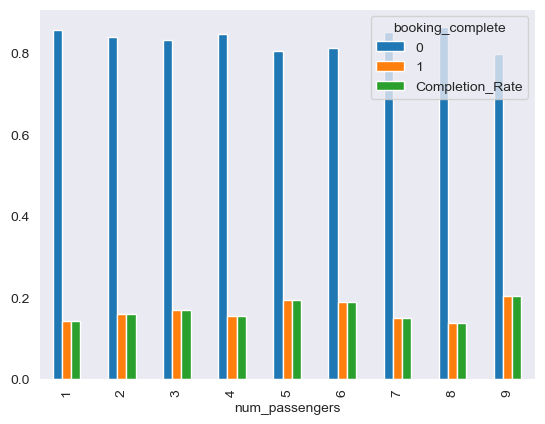

In [89]:
ct1.plot(kind='bar')

### "Completion Rate by Sales Channel"

In [125]:
ct2=pd.crosstab(df['sales_channel'], df['booking_complete'], normalize='index')
ct2

booking_complete,0,1
sales_channel,,
Internet,0.845230,0.154770
Mobile,0.891598,0.108402


<AxesSubplot: xlabel='sales_channel'>

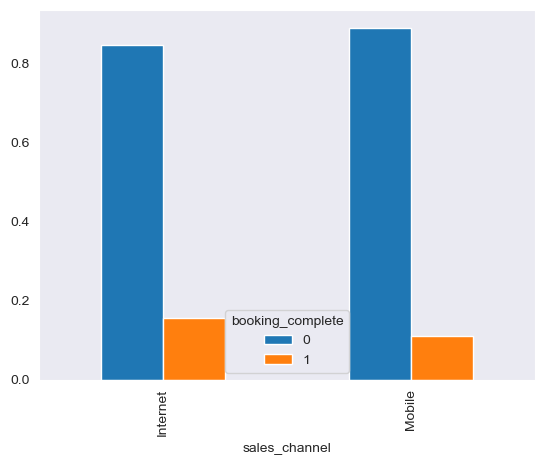

In [91]:
ct2.plot(kind='bar')

### "Booking Completion for Trip Type"

In [126]:
ct3=pd.crosstab(df['trip_type'], df['booking_complete'], normalize='index')
ct3['Completion_Rate'] = ct3[1] / (ct3[0] + ct3[1])
ct3

booking_complete,0,1,Completion_Rate
trip_type,,,
CircleTrip,0.956897,0.043103,0.043103
OneWay,0.948320,0.051680,0.051680
RoundTrip,0.849425,0.150575,0.150575


<AxesSubplot: xlabel='trip_type'>

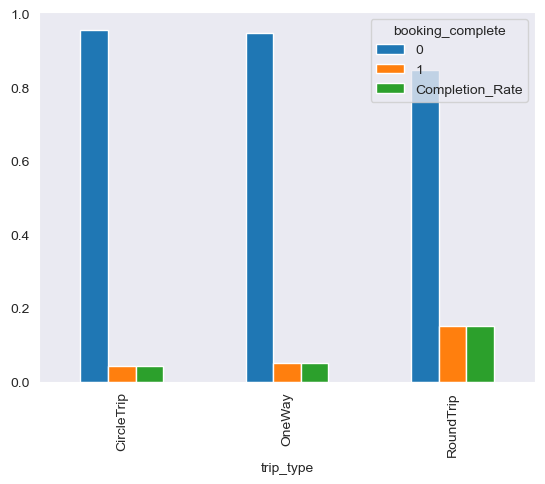

In [93]:
ct3.plot(kind='bar')

In [94]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [95]:
pd.crosstab(df['flight_day'],df['booking_complete'],normalize=True)

booking_complete,0,1
flight_day,,
Fri,0.115846,0.019805
Mon,0.137862,0.024228
Sat,0.098780,0.017349
Sun,0.112234,0.018486
Thu,0.126093,0.022504
Tue,0.130720,0.022646
Wed,0.128488,0.024959


- From the data, it can be observed that the completion rate of flights is higher on weekdays compared to weekends. Specifically, Monday has the highest completion rate among weekdays, while Saturday has the lowest completion rate among weekends. This could be due to various factors such as fewer flights on weekends, increased passenger traffic on weekends, and potential delays or cancellations due to adverse weather conditions.

<AxesSubplot: xlabel='sales_channel', ylabel='count'>

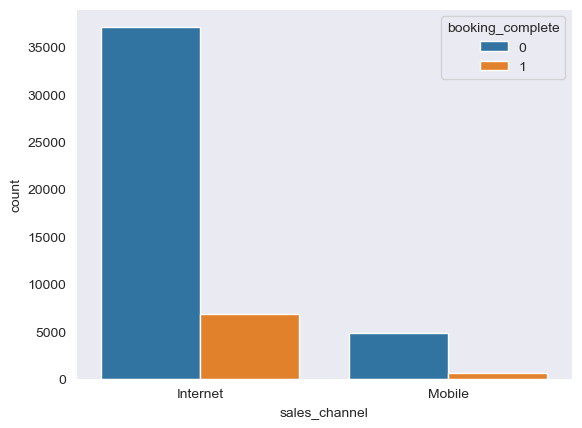

In [96]:
sns.set_style('dark')
sns.countplot(data=df,x='sales_channel',hue='booking_complete')

<AxesSubplot: xlabel='trip_type', ylabel='count'>

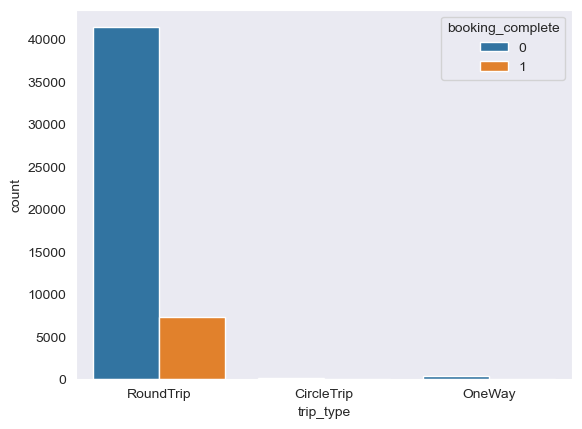

In [97]:
sns.countplot(data=df,x='trip_type',hue='booking_complete')

<AxesSubplot: xlabel='flight_day', ylabel='count'>

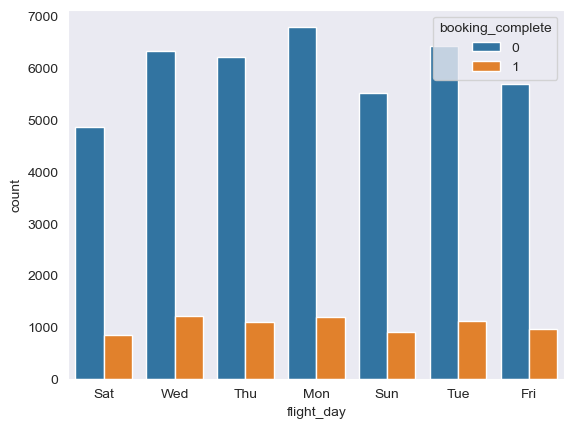

In [98]:
sns.countplot(data=df,x='flight_day',hue='booking_complete')

<AxesSubplot: xlabel='wants_extra_baggage', ylabel='count'>

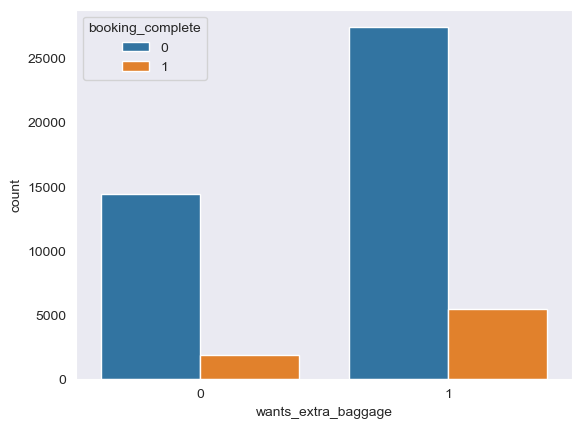

In [99]:
sns.countplot(data=df,x='wants_extra_baggage',hue='booking_complete')

<AxesSubplot: xlabel='wants_preferred_seat', ylabel='count'>

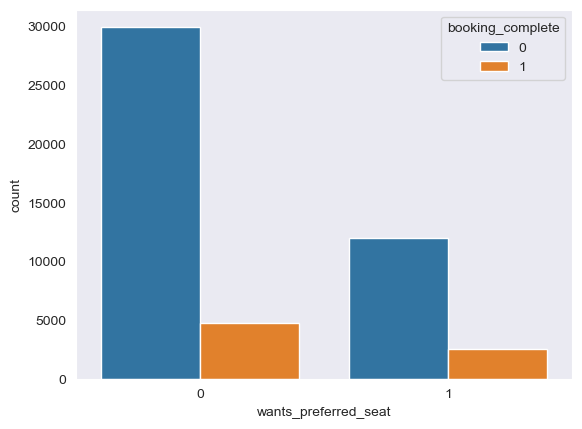

In [100]:
sns.countplot(data=df,x='wants_preferred_seat',hue='booking_complete')

<AxesSubplot: xlabel='wants_in_flight_meals', ylabel='count'>

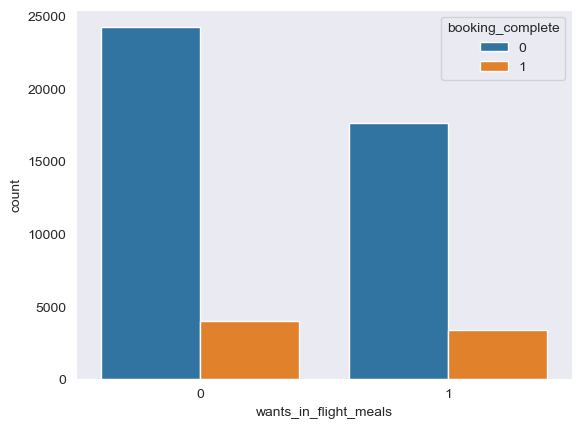

In [101]:
sns.countplot(data=df,x='wants_in_flight_meals',hue='booking_complete')

# Feature Engineering

> Adding Features

- Creating a new feature 'total_travel_time' by adding 'length_of_stay' and 'flight_duration'. This feature can capture the total time a passenger will be traveling, which may be important in predicting booking completion.

In [102]:
df['total_travel_time']=df['length_of_stay']+df['flight_duration']
df.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_travel_time
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,24.52
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,25.52
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,27.52


- Creating a new feature 'has_special_request' by combining the 'wants_extra_baggage', 'wants_preferred_seat', and 'wants_in_flight_meals' features.

In [103]:
special_request=df['wants_extra_baggage']+df['wants_in_flight_meals']+df['wants_preferred_seat']
df['has_special_request']=(special_request>0).astype(int)

# Handling Imbalance Datasets

In [104]:
df.booking_complete.value_counts()

0    41890
1     7391
Name: booking_complete, dtype: int64

In [105]:
from sklearn.preprocessing import LabelEncoder

In [106]:
for col in df.columns:
    le=LabelEncoder()
    le.fit(df[col])
    df[col]=le.transform(df[col])

In [107]:
from imblearn.over_sampling import SMOTE

In [108]:
# Separate the features and target variable
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Perform SMOTE on the data
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [109]:
y_res.value_counts()

0    41890
1    41890
Name: booking_complete, dtype: int64

- Data is balanced now

# Feature Selection

In [110]:
from sklearn.feature_selection import SelectKBest,chi2
ch2=SelectKBest(chi2,k=5)
X_new=ch2.fit_transform(X,y)
results=pd.DataFrame(ch2.scores_,columns=['chi2_scores'])
results.sort_values(by='chi2_scores',ascending=False,inplace=True)
results['Column_name']=X.columns

In [111]:
results

,chi2_scores,Column_name
13,42333.593380,num_passengers
8,23760.160148,sales_channel
3,2352.831001,trip_type
4,1988.043689,purchase_lead
12,1552.239490,length_of_stay
7,406.056207,flight_hour
10,87.438803,flight_day
9,76.610468,route
1,67.896874,booking_origin
0,50.082646,wants_extra_baggage


In [112]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'total_travel_time', 'has_special_request'],
      dtype='object')

# Model Building

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=0)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:
from sklearn.metrics import accuracy_score
acc_score=accuracy_score(y_test,y_pred)
print("Accuracy:",acc_score)

Accuracy: 0.6398305084745762


In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
df.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_travel_time,has_special_request
0,1,0,2,262,9,7,2,0,61,1,0,0,8,0,133,1
1,0,0,2,112,10,3,2,0,61,0,0,0,8,0,146,0
2,1,0,2,243,12,17,6,0,36,1,1,0,8,0,176,1


In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [118]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      8279
           1       0.86      0.89      0.88      8477

    accuracy                           0.87     16756
   macro avg       0.88      0.87      0.87     16756
weighted avg       0.88      0.87      0.87     16756

